## Classification-Guided Encoding CIFAR10

In [1]:
import torch
import argparse
import CIFAR10_122   
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=128,
    latent_dim=128,
    device=device
)

# Architecture Reasoning 

## 1. Data Loading and Augmentation

### What We Do:
- Use CIFAR-10 dataset (10 classes, RGB images).
- Add **data augmentation** for better generalization:
  - Random horizontal flip
  - Small random rotation
- Normalize images to range `[-1, 1]`.

### Why It Helps:
- Prevents overfitting
- Makes the model more robust to real-world variation

---

## 2. Encoder Model 

### Layer Breakdown:
1. **Conv Layer 1 (3 → 64 channels)**
   - Stride 2, Kernel 4 → downscales to (16×16)
   - Adds BatchNorm + ReLU
   - Finds basic textures  

2. **Conv Layer 2 (64 → 128 channels)**
   - Downscales to (8×8)
   - Learns more detailed shapes

3. **Conv Layer 3 (128 → 128 latent dim)**
   - Outputs single 1×1 features (global info)
   - Final compressed representation

### Why It Works:
- Small but deep enough to learn meaningful encodings
- BatchNorm stabilizes training

---

## 3. Classifier 

### What It Looks Like:
- Fully connected layers:
  - `128 → 64 → 10`
- ReLU + Dropout (0.5) to reduce overfitting

### Why It Works:
- Lightweight
- Regularized with dropout
- Just enough to classify from compact latent vectors

---

## 4. Training Setup

| Component            | Value                    | Why                     |
|----------------------|--------------------------|--------------------------|
| Loss Function        | CrossEntropyLoss         | Standard for classification |
| Optimizer            | Adam + weight decay      | Fast and stable          |
| Batch Size           | 128                      | Adjustable for GPU       |
| Epochs               | 30                       | Enough to learn patterns |
| LR Scheduler         | StepLR every 10 epochs   | Helps fine-tune at end   |

---

## 5. Training Loop Logic

### Per Epoch:
- Train on all batches
- Track **loss and accuracy**
- Run **validation** after each epoch
- Adjust learning rate gradually

### Why It’s Good:
- Combines performance tracking with learning rate tuning
- Helps avoid overfitting while maintaining speed

In [2]:
train_loader, val_loader, test_loader = CIFAR10_122.load_data(args)
encoder_model = CIFAR10_122.Encoder(args.latent_dim).to(args.device)
classifier_model = CIFAR10_122.Classifier(args.latent_dim).to(args.device)

Files already downloaded and verified


Files already downloaded and verified


## Training Autoencoder Classifier

Epoch [1/30], Train Loss: 1.7352, Train Acc: 36.63%, Val Loss: 1.4015, Val Acc: 47.53%, Test Loss: 1.3879, Test Acc: 48.70%


Epoch [2/30], Train Loss: 1.4205, Train Acc: 48.67%, Val Loss: 1.3183, Val Acc: 52.27%, Test Loss: 1.2895, Test Acc: 53.51%


Epoch [3/30], Train Loss: 1.2905, Train Acc: 54.10%, Val Loss: 1.1840, Val Acc: 56.81%, Test Loss: 1.1649, Test Acc: 57.04%


Epoch [4/30], Train Loss: 1.1923, Train Acc: 57.44%, Val Loss: 1.0656, Val Acc: 61.75%, Test Loss: 1.0429, Test Acc: 62.82%


Epoch [5/30], Train Loss: 1.1145, Train Acc: 60.87%, Val Loss: 1.0193, Val Acc: 62.82%, Test Loss: 0.9989, Test Acc: 63.25%


Epoch [6/30], Train Loss: 1.0576, Train Acc: 62.86%, Val Loss: 1.0094, Val Acc: 64.53%, Test Loss: 0.9855, Test Acc: 65.20%


Epoch [7/30], Train Loss: 1.0173, Train Acc: 64.52%, Val Loss: 0.9233, Val Acc: 67.76%, Test Loss: 0.9076, Test Acc: 68.33%


Epoch [8/30], Train Loss: 0.9675, Train Acc: 66.54%, Val Loss: 0.8973, Val Acc: 68.58%, Test Loss: 0.8808, Test Acc: 68.87%


Epoch [9/30], Train Loss: 0.9304, Train Acc: 67.70%, Val Loss: 0.9167, Val Acc: 68.20%, Test Loss: 0.9039, Test Acc: 68.46%


Epoch [10/30], Train Loss: 0.9095, Train Acc: 68.69%, Val Loss: 0.8936, Val Acc: 68.77%, Test Loss: 0.8869, Test Acc: 69.53%


Epoch [11/30], Train Loss: 0.8062, Train Acc: 72.07%, Val Loss: 0.7700, Val Acc: 73.40%, Test Loss: 0.7640, Test Acc: 73.57%


Epoch [12/30], Train Loss: 0.7707, Train Acc: 73.17%, Val Loss: 0.7576, Val Acc: 73.52%, Test Loss: 0.7545, Test Acc: 73.89%


Epoch [13/30], Train Loss: 0.7590, Train Acc: 73.81%, Val Loss: 0.7555, Val Acc: 73.39%, Test Loss: 0.7461, Test Acc: 74.25%


Epoch [14/30], Train Loss: 0.7473, Train Acc: 74.37%, Val Loss: 0.7394, Val Acc: 74.38%, Test Loss: 0.7399, Test Acc: 74.66%


Epoch [15/30], Train Loss: 0.7367, Train Acc: 74.61%, Val Loss: 0.7401, Val Acc: 74.25%, Test Loss: 0.7430, Test Acc: 74.25%


Epoch [16/30], Train Loss: 0.7268, Train Acc: 74.79%, Val Loss: 0.7403, Val Acc: 74.49%, Test Loss: 0.7354, Test Acc: 74.51%


Epoch [17/30], Train Loss: 0.7202, Train Acc: 75.00%, Val Loss: 0.7246, Val Acc: 74.67%, Test Loss: 0.7274, Test Acc: 74.32%


Epoch [18/30], Train Loss: 0.7072, Train Acc: 75.75%, Val Loss: 0.7291, Val Acc: 74.41%, Test Loss: 0.7193, Test Acc: 75.07%


Epoch [19/30], Train Loss: 0.7002, Train Acc: 76.11%, Val Loss: 0.7243, Val Acc: 74.88%, Test Loss: 0.7186, Test Acc: 75.02%


Epoch [20/30], Train Loss: 0.7020, Train Acc: 75.93%, Val Loss: 0.7259, Val Acc: 74.15%, Test Loss: 0.7232, Test Acc: 74.88%


Epoch [21/30], Train Loss: 0.6829, Train Acc: 76.50%, Val Loss: 0.7130, Val Acc: 75.12%, Test Loss: 0.7100, Test Acc: 75.11%


Epoch [22/30], Train Loss: 0.6760, Train Acc: 76.74%, Val Loss: 0.7164, Val Acc: 74.90%, Test Loss: 0.7116, Test Acc: 74.94%


Epoch [23/30], Train Loss: 0.6745, Train Acc: 76.79%, Val Loss: 0.7252, Val Acc: 75.14%, Test Loss: 0.7073, Test Acc: 75.27%


Epoch [24/30], Train Loss: 0.6745, Train Acc: 76.65%, Val Loss: 0.7136, Val Acc: 75.08%, Test Loss: 0.7087, Test Acc: 75.51%


Epoch [25/30], Train Loss: 0.6702, Train Acc: 77.02%, Val Loss: 0.7123, Val Acc: 75.10%, Test Loss: 0.7147, Test Acc: 75.04%


Epoch [26/30], Train Loss: 0.6722, Train Acc: 76.81%, Val Loss: 0.7100, Val Acc: 75.20%, Test Loss: 0.7115, Test Acc: 75.40%


Epoch [27/30], Train Loss: 0.6705, Train Acc: 76.86%, Val Loss: 0.7157, Val Acc: 74.96%, Test Loss: 0.7150, Test Acc: 75.18%


Epoch [28/30], Train Loss: 0.6718, Train Acc: 76.83%, Val Loss: 0.7203, Val Acc: 74.83%, Test Loss: 0.7056, Test Acc: 75.39%


Epoch [29/30], Train Loss: 0.6686, Train Acc: 77.19%, Val Loss: 0.7096, Val Acc: 75.57%, Test Loss: 0.7105, Test Acc: 75.34%


Epoch [30/30], Train Loss: 0.6611, Train Acc: 77.17%, Val Loss: 0.7059, Val Acc: 75.54%, Test Loss: 0.7128, Test Acc: 75.46%


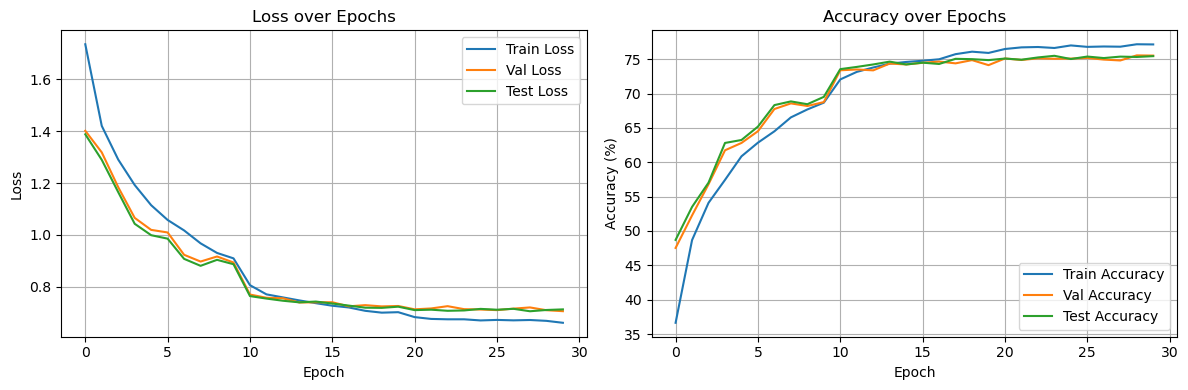

In [3]:
CIFAR10_122.train_encoder_classifier(encoder_model, classifier_model, train_loader, val_loader,test_loader, args, epochs=30)

# Classification-Guided Encoder Results  
---

## 1. Accuracy and Loss  
### Training Progress (30 Epochs):

| Epoch | Train Accuracy | Val Accuracy | Test Accuracy |
|-------|----------------|--------------|----------------|
| 1     | 36.63%         | 47.53%       | 48.70%         |
| 10    | 68.69%         | 68.77%       | 69.53%         |
| 20    | 75.93%         | 74.15%       | 74.88%         |
| 30    | 77.17%         | 75.54%       | 75.46%         |

---

## 2. What We Learned  
### Understanding the Results:

1. **Fast and Smooth Learning**  
   - Accuracy grows steadily and reaches high values by epoch 30  
   - Over 75% accuracy on test set means the encoder learned useful features

2. **No Overfitting**  
   - Validation and test accuracies are close to training  
   - Model generalizes well to unseen data

3. **Much Better Than 1.2.1**  
   - In 1.2.1, the encoder focused on reconstruction and overfit  
   - Here, accuracy is **much higher**, and the model performs well on real classification

---

## 3. Final Conclusion

Training the encoder **together with the classifier** using **cross-entropy loss** led to much better feature learning.  
The encoder now produces **class-aware latent vectors** that help the classifier generalize and perform better.


## t-SNE Analysis of Latent Spaces

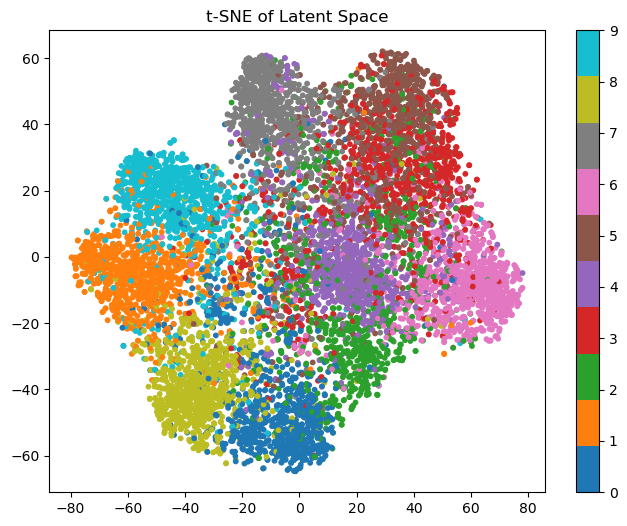

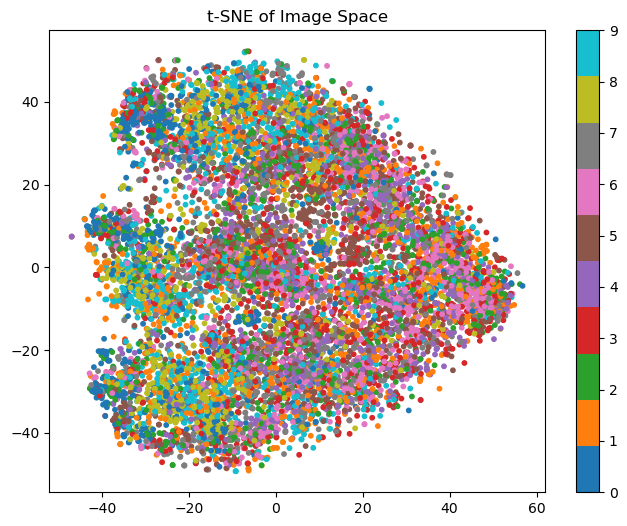

In [4]:
CIFAR10_122.plot_tsne(encoder_model, test_loader, args.device)

## t-SNE Visualization  
---

We visualized the **latent space** and **original image space** using t-SNE.

1. **Image Space (Bottom)**  
   - Classes are heavily mixed  
   - No clear structure — colors are spread everywhere  
   - Shows that raw images are not easy to separate directly

2. **Latent Space (Top)**  
   - Each class forms a separate cluster  
   - Same-colored points are grouped together  
   - Clear boundaries between different classes

### Conclusion:
The encoder learned to organize features by class.  
This confirms that **training with classification loss (1.2.2)** produces a **structured latent space** where similar images are close and different ones are far.